This is IPL's match data from 2008-2020.

# Importing Python packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotnine
import datetime
from collections import Counter

# Reading the data

In [3]:
#Command used to read the .csv/xlsx file uploaded on Jupyter
# If you have your file on local,use the 'C:\\Users\\...YourFileName.xlsx'.
df = pd.read_csv("IPL_Matches.csv")

# Viewing and Understanding the data

In [4]:
# Command used to see or view the data uploaded which also tells us the number of rows and columns in its output
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [5]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

This data has 816 rows and 17 columns.Lets check all the columns as well and decide how to proceed to clean the data.


In [6]:
# This command is used to describe numerical data columns only. 
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


For neutral_venue:
1) We have no missing row value in this column but the term neutral_venue meaning is missing and unclear.
2) Its maximun value is 1 and minimun value is 0 with a mean of 0.09. 

For result_margin: (Win  by runs or win by wickets)
1) It is clear that 17 values are not numerical and we will see it later.
2) We need to distribute this column data accordign to win by wickets or win by runs whcih will make the data more clear.Max is 146, so a team won a match by maximum of 146 runs ( As we cant have 146 wickets).

It also concludes that only neutral_venue and result_margin columns has numerical values.

In [7]:
# This command is used get the number of non-null values and data type of the column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

Columns like city, player_of_match, winner, result, result_margin, eliminatior and method has NA as values.

In [9]:
# This command is used to get number of unique values in a column
len(pd.unique(df["venue"]))

36

There are 36 unique venues across all IPL seasons.

In [10]:
# This command is used to get the unique values
df["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [11]:
len(pd.unique(df["player_of_match"]))

234

A total of 234 different players have won player of match awards.

In [12]:
df["player_of_match"].unique()

array(['BB McCullum', 'MEK Hussey', 'MF Maharoof', 'MV Boucher',
       'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden', 'YK Pathan',
       'KC Sangakkara', 'JDP Oram', 'AC Gilchrist', 'SM Katich',
       'MS Dhoni', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 'IK Pathan', 'SM Pollock',
       'Sohail Tanvir', 'S Sreesanth', 'A Nehra', 'SC Ganguly',
       'CRD Fernando', 'L Balaji', 'Shoaib Akhtar', 'A Mishra',
       'DPMD Jayawardene', 'GC Smith', 'DJ Bravo', 'M Ntini',
       'SP Goswami', 'A Kumble', 'KD Karthik', 'JA Morkel', 'P Kumar',
       'Umar Gul', 'SK Raina', 'SR Tendulkar', 'R Dravid', 'DL Vettori',
       'RP Singh', 'M Muralitharan', 'CH Gayle', 'AB de Villiers',
       'RS Bopara', 'PP Ojha', 'TM Dilshan', 'HH Gibbs', 'DP Nannes',
       'JP Duminy', 'Yuvraj Singh', 'SB Jakati', 'JH Kallis', 'G Gambhir',
       'RG Sharma', 'A Singh', 'S Badrinath', 'DR Smith', 'LRPL Taylor',
       'Harbhajan Singh', 'R Bhatia', 'SK Warne', 'B

In [13]:
# This command is used to collect the count of distinct values 
print(Counter(df["player_of_match"]))

Counter({'AB de Villiers': 23, 'CH Gayle': 22, 'RG Sharma': 18, 'MS Dhoni': 17, 'DA Warner': 17, 'SR Watson': 16, 'YK Pathan': 16, 'SK Raina': 14, 'G Gambhir': 13, 'V Kohli': 13, 'MEK Hussey': 12, 'AM Rahane': 12, 'V Sehwag': 11, 'A Mishra': 11, 'DR Smith': 11, 'KA Pollard': 11, 'AD Russell': 11, 'JH Kallis': 10, 'AT Rayudu': 10, 'SE Marsh': 9, 'RA Jadeja': 9, 'SP Narine': 9, 'SR Tendulkar': 8, 'Harbhajan Singh': 8, 'S Dhawan': 8, 'UT Yadav': 8, 'Rashid Khan': 8, 'AC Gilchrist': 7, 'RV Uthappa': 7, 'SV Samson': 7, 'KL Rahul': 7, 'A Nehra': 6, 'BJ Hodge': 6, 'SL Malinga': 6, 'M Vijay': 6, 'Sandeep Sharma': 6, 'HH Pandya': 6, 'RR Pant': 6, 'JJ Bumrah': 6, 'JC Buttler': 6, 'BB McCullum': 5, 'KC Sangakkara': 5, 'SC Ganguly': 5, 'DPMD Jayawardene': 5, 'KD Karthik': 5, 'Yuvraj Singh': 5, 'MK Pandey': 5, 'JD Unadkat': 5, 'DW Steyn': 5, 'SPD Smith': 5, 'AJ Finch': 5, 'JP Faulkner': 5, 'PA Patel': 5, 'GJ Maxwell': 5, 'B Kumar': 5, 'AR Patel': 5, 'SS Iyer': 5, 'SA Yadav': 5, 'BA Stokes': 5, 'ML 

AB de Villiers has won most number of player_of_match awards i.e 23.(till 2020)
You can confirm : https://www.sportskeeda.com/cricket/ipl-most-man-of-the-match#:~:text=With%2025%20Man%20of%20the,match%20in%20IPL%20so%20far. ( till 2022)

In [14]:
print(Counter(df["city"]))

Counter({'Mumbai': 101, 'Kolkata': 77, 'Delhi': 74, 'Bangalore': 65, 'Hyderabad': 64, 'Chennai': 57, 'Chandigarh': 56, 'Jaipur': 47, 'Pune': 38, 'Abu Dhabi': 29, 'Dubai': 26, 'Durban': 15, 'Bengaluru': 15, 'Visakhapatnam': 13, nan: 13, 'Centurion': 12, 'Ahmedabad': 12, 'Sharjah': 12, 'Rajkot': 10, 'Dharamsala': 9, 'Indore': 9, 'Johannesburg': 8, 'Cape Town': 7, 'Port Elizabeth': 7, 'Cuttack': 7, 'Ranchi': 7, 'Raipur': 6, 'Kochi': 5, 'Kanpur': 4, 'East London': 3, 'Kimberley': 3, 'Nagpur': 3, 'Bloemfontein': 2})


Mumbai has organised most number of IPL matches i.e 101.

In [15]:
print(Counter(df["winner"]))

Counter({'Mumbai Indians': 120, 'Chennai Super Kings': 106, 'Kolkata Knight Riders': 99, 'Royal Challengers Bangalore': 91, 'Kings XI Punjab': 88, 'Rajasthan Royals': 81, 'Delhi Daredevils': 67, 'Sunrisers Hyderabad': 66, 'Deccan Chargers': 29, 'Delhi Capitals': 19, 'Gujarat Lions': 13, 'Pune Warriors': 12, 'Rising Pune Supergiant': 10, 'Kochi Tuskers Kerala': 6, 'Rising Pune Supergiants': 5, nan: 4})


Mumbai has won most number of IPL matches i.e 120.

In [16]:
set(df["team1"])

{'Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

As Rising Pune Supergiants and Rising Pune Supergiant are same teams with a difference of small 's', we conclude

No. of IPL teams registeted till 2020 are 14.

# Cleaning & Preprocessing the data

Lets Replace All Rising Pune Supergiant as Rising Pune Supergiants

In [17]:
# This command is used replace all wrong values with correct ones.
df = df.replace(to_replace="Rising Pune Supergiant",value="Rising Pune Supergiants")

Lets work on getting the null values replaced or removed.

id                   0

city                13

date                 0

player_of_match      4

venue                0

neutral_venue        0

team1                0

team2                0

toss_winner          0

toss_decision        0

winner               4

result               4

result_margin       17

eliminator           4

method             797

umpire1              0

umpire2              0

dtype: int64

In [18]:
# This command is used to check the row values with city value as null.
df[df['city'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


It is visible that 13 rows has city column empty and all are from the year 2014 with venue as UAE.
With the original data, It is clearly visible that for Dubai International Cricket Stadium city is Dubai and for Sharjah Cricket Stadium it is Sharjan.

So now we will rectify these 13 rows with missing city values.

In [19]:
# Updated missing city row values and original dataset is updated
na_value_city = df[df['city'].isna()]
na_value_city_dubai= na_value_city.loc[df['venue'] == 'Dubai International Cricket Stadium']
na_value_city_dubai['city'] = na_value_city_dubai['city'].fillna("Dubai")
na_value_city_sharjan = na_value_city.loc[df['venue'] == 'Sharjah Cricket Stadium']
na_value_city_sharjan['city'] = na_value_city_sharjan['city'].fillna("Sharjan")
df.update(na_value_city_dubai)
df.update(na_value_city_sharjan)

C:\Users\hp\AppData\Local\Temp\ipykernel_13948\3597706122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\AppData\Local\Temp\ipykernel_13948\3597706122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Lets see player_of_match now 

In [20]:
# This command is used to check the row values with player_of_match value as null.
player_of_match_null = df[df['player_of_match'].isna()]
player_of_match_null

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265.0,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0.0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763.0,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813.0,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424.0,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


We have 4 rows with NA as player_of_match. These are also the matches which were abandoned due to rain or bad weather which is one of the most common reason.

We will delete these data as many of the rows values are NA.

In [21]:
# This command is used to get indexes of row values with player_of_match value as null.
index = player_of_match_null.index

In [22]:
# This command is used to drop rows with specific indexes. ( axis = 0(row) , axis= 1(column))
df.drop(index,axis=0, inplace=True)

### Tied Matches

In [23]:
# This command is used to check the row values with result_margin value as null.
tie_matches = df[df['result_margin'].isna()]
tie_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190.0,Cape Town,2009-04-23,YK Pathan,Newlands,1.0,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121.0,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0.0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004.0,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0.0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017.0,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315.0,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1.0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741.0,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0.0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625.0,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0.0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365.0,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0.0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426.0,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0.0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493.0,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0.0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


There were 13 matches which were tie and the result wss dependent on Super Over.


In [24]:
# This command is used to get a dictionary with highest number of super over wins.
print(Counter(tie_matches["winner"]))

Counter({'Kings XI Punjab': 3, 'Rajasthan Royals': 2, 'Royal Challengers Bangalore': 2, 'Mumbai Indians': 2, 'Delhi Capitals': 2, 'Sunrisers Hyderabad': 1, 'Kolkata Knight Riders': 1})


Kings XI Punjab has won highest number of Super Overs.


In [25]:
# These commands are used to get  dictionaries with highest number of super over matches played.
print(Counter(tie_matches["team1"]))
print(Counter(tie_matches["team2"]))

Counter({'Kolkata Knight Riders': 3, 'Royal Challengers Bangalore': 2, 'Delhi Capitals': 2, 'Mumbai Indians': 2, 'Chennai Super Kings': 1, 'Sunrisers Hyderabad': 1, 'Rajasthan Royals': 1, 'Gujarat Lions': 1})
Counter({'Kings XI Punjab': 4, 'Rajasthan Royals': 2, 'Mumbai Indians': 2, 'Sunrisers Hyderabad': 2, 'Royal Challengers Bangalore': 1, 'Delhi Daredevils': 1, 'Kolkata Knight Riders': 1})


Kings XI Punjab, Mumbai Indians and Kolkata Knight Riders have played highest number of Super Overs i.e 4.

In [26]:
# This command is used to get a dictionary with highest number of super over wins.
print(Counter(tie_matches["umpire1"]))
print(Counter(tie_matches["umpire2"]))

Counter({'AK Chaudhary': 3, 'M Erasmus': 2, 'Nitin Menon': 2, 'MR Benson': 1, 'K Hariharan': 1, 'Aleem Dar': 1, 'AY Dandekar': 1, 'CK Nandan': 1, 'PG Pathak': 1})
Counter({'S Ravi': 4, 'Nitin Menon': 2, 'PR Reiffel': 2, 'M Erasmus': 1, 'DJ Harper': 1, 'VA Kulkarni': 1, 'AK Chaudhary': 1, 'CB Gaffaney': 1})


S Ravi, Nitin Menon and AK Chaudhary have been umpiring (on-ground) for most number of super-over matches i.e 4.

In [27]:
print(Counter(tie_matches["venue"]))

Counter({'Dubai International Cricket Stadium': 3, 'Sheikh Zayed Stadium': 2, 'Newlands': 1, 'MA Chidambaram Stadium, Chepauk': 1, 'Rajiv Gandhi International Stadium, Uppal': 1, 'M Chinnaswamy Stadium': 1, 'Sardar Patel Stadium, Motera': 1, 'Saurashtra Cricket Association Stadium': 1, 'Feroz Shah Kotla': 1, 'Wankhede Stadium': 1})


Dubai International Cricket Stadium has witnessed most number of super overs i.e 3.

We will delete all data about the tied matches to get better and accurate results on normal matches.


In [28]:
# This command is used to get indexes of row values with result_margin value as null.
index1 = tie_matches.index
index1

Int64Index([66, 130, 328, 341, 416, 476, 610, 705, 746, 757, 776, 781, 811], dtype='int64')

In [29]:
# This command is used to drop tied matches rows with specific indexes. (axis = 0(row) , axis= 1(column))
df.drop(index1,axis=0, inplace=True)

In [30]:
result_margin_not_null = df[~df['method']. isna()]
result_margin_not_null

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022.0,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0.0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025.0,Kolkata,2008-05-18,M Ntini,Eden Gardens,0.0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183.0,Cape Town,2009-04-19,DL Vettori,Newlands,1.0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
63,392186.0,Durban,2009-04-21,CH Gayle,Kingsmead,1.0,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade
89,392214.0,Centurion,2009-05-07,ML Hayden,SuperSport Park,1.0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene
192,501215.0,Kochi,2011-04-18,BB McCullum,Nehru Stadium,0.0,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,N,D/L,K Hariharan,AL Hill
221,501245.0,Kolkata,2011-05-07,Iqbal Abdulla,Eden Gardens,0.0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10.0,N,D/L,Asad Rauf,PR Reiffel
231,501255.0,Bangalore,2011-05-14,CH Gayle,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,N,D/L,RE Koertzen,RB Tiffin
429,733993.0,Delhi,2014-05-10,DW Steyn,Feroz Shah Kotla,0.0,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,N,D/L,RM Deshpande,BNJ Oxenford
477,829743.0,Visakhapatnam,2015-04-22,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,0.0,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,N,D/L,RK Illingworth,VA Kulkarni


These 19 matches were decided on duckworth lewis method and these were not eliminator matches.

In [31]:
print(Counter(result_margin_not_null["winner"]))

Counter({'Kolkata Knight Riders': 4, 'Royal Challengers Bangalore': 3, 'Kings XI Punjab': 2, 'Chennai Super Kings': 2, 'Delhi Daredevils': 2, 'Sunrisers Hyderabad': 2, 'Rising Pune Supergiants': 2, 'Kochi Tuskers Kerala': 1, 'Rajasthan Royals': 1})


Kolkata Knight Riders have won most of the matches via D/L method i.e 4.

In [32]:
print(Counter(result_margin_not_null["player_of_match"]))

Counter({'CH Gayle': 2, 'V Kohli': 2, 'AB Dinda': 2, 'DPMD Jayawardene': 1, 'M Ntini': 1, 'DL Vettori': 1, 'ML Hayden': 1, 'BB McCullum': 1, 'Iqbal Abdulla': 1, 'DW Steyn': 1, 'DA Warner': 1, 'YK Pathan': 1, 'NM Coulter-Nile': 1, 'SV Samson': 1, 'KL Rahul': 1, 'RR Pant': 1})


Suprisingly, CH Gayle, V Kohli and AB Dinda have been able to bag player_of_match award in these matches also with highest number 2.

# Exploratory data analysis

# Univariate

## City


<AxesSubplot:>

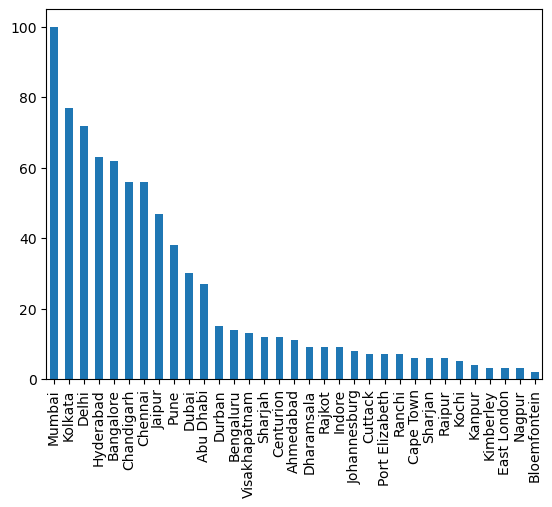

In [33]:
df['city'].value_counts().plot.bar()

Most number of matches are organised by Mumbai followed by Kolkata and Delhi respectively.

## Date

<AxesSubplot:xlabel='count', ylabel='year'>

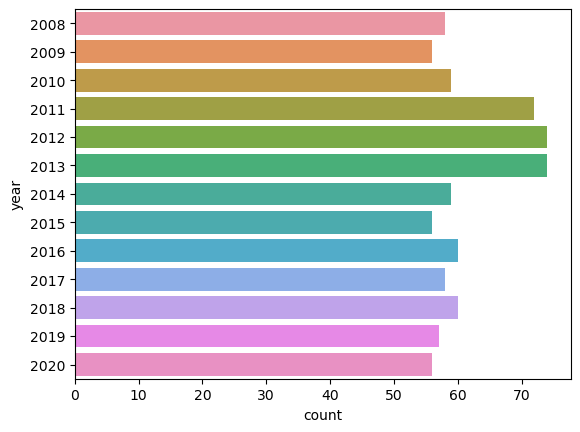

In [34]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
sns.countplot(data=df['date'], y=df['year'])

The number of matches were more in year 2011, 2012 an 2013 because of more number of participating teams.

## Venue

<AxesSubplot:>

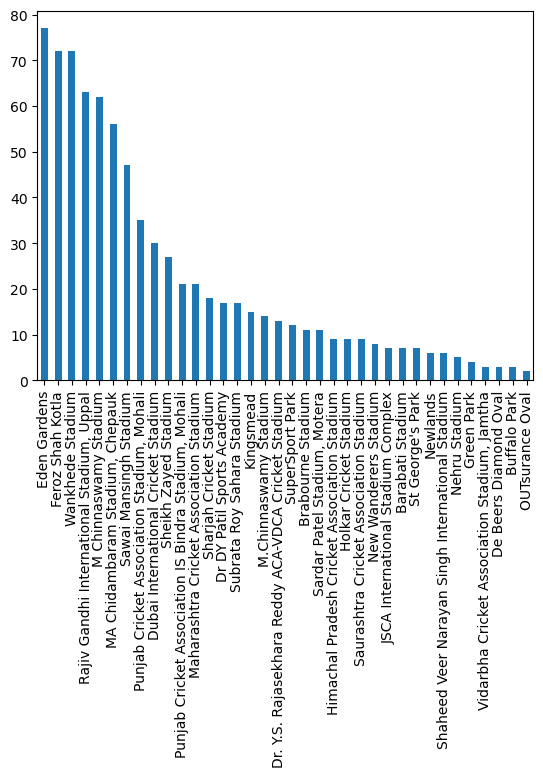

In [35]:
df['venue'].value_counts().plot.bar()

Eden Garden has organised most number of matches in the history of IPL till 2020.

## Neutral_Venue

<AxesSubplot:xlabel='neutral_venue', ylabel='count'>

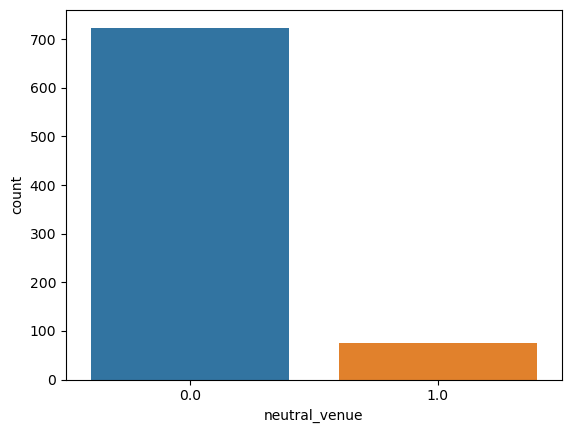

In [36]:
sns.countplot(x=df["neutral_venue"])

In [37]:
print(Counter(df["neutral_venue"]))

Counter({0.0: 724, 1.0: 75})


75 matches were played outside India in the span of 13 years.

## Toss Decision

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

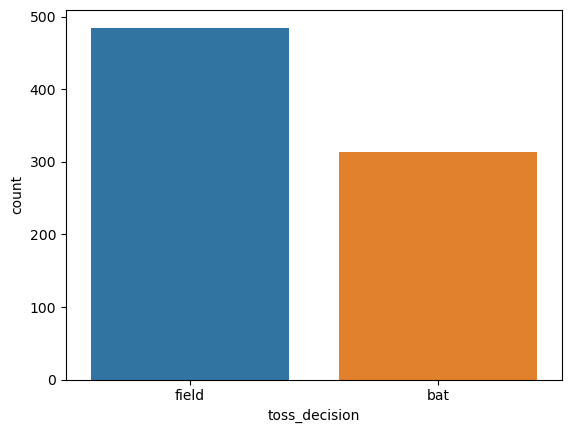

In [38]:
sns.countplot(x=df["toss_decision"])

In [39]:
print(Counter(df["toss_decision"]))

Counter({'field': 485, 'bat': 314})


Out of 799 normal matches, 485 teams who won the toss fields first and 314 bats first.

## Toss Winners

<AxesSubplot:xlabel='count', ylabel='toss_winner'>

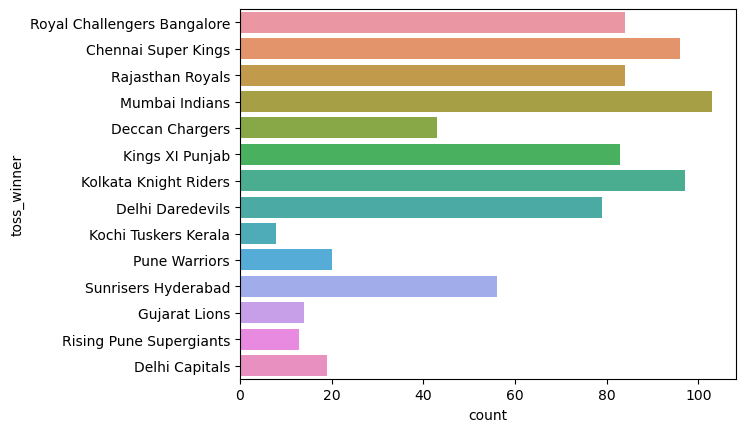

In [40]:
sns.countplot(y=df["toss_winner"])

Most number of tosses are won by Mumbai Indians followed by Kolkata Knight Riders.

## Match Winners

<AxesSubplot:xlabel='count', ylabel='winner'>

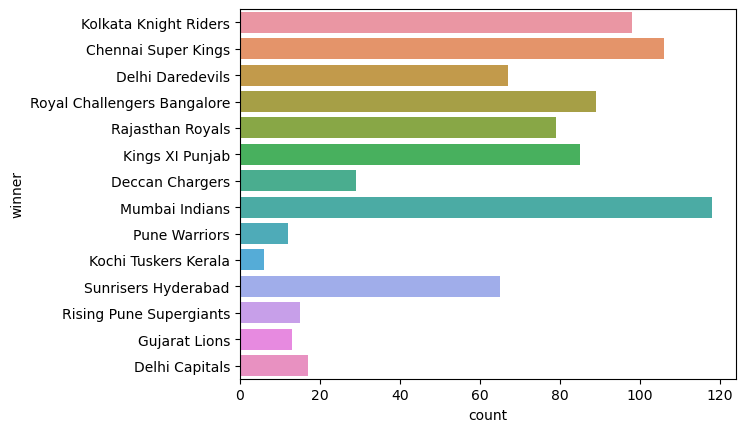

In [41]:
sns.countplot(y=df["winner"])

Most number of matches are won by Mumbai Indians followed by Chennai Super Kings.

# Bivariate

<AxesSubplot:xlabel='count'>

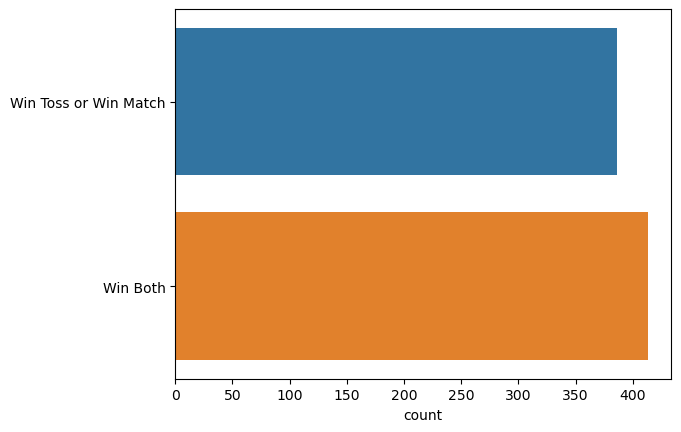

In [44]:
list_of_01 = []
for index, row in df.iterrows():
    if row["toss_winner"] == row["winner"]:    # No of teams winning toss and then winning match
        list_of_01.append("Win Both")
    else:
        list_of_01.append("Win Toss or Win Match") # No of teams winning toss and but losing the match
sns.countplot(y=list_of_01)

As, No. of 1's > No. of 0's , it clearly tells that its more likely to win a match if you win the toss.


<AxesSubplot:xlabel='count'>

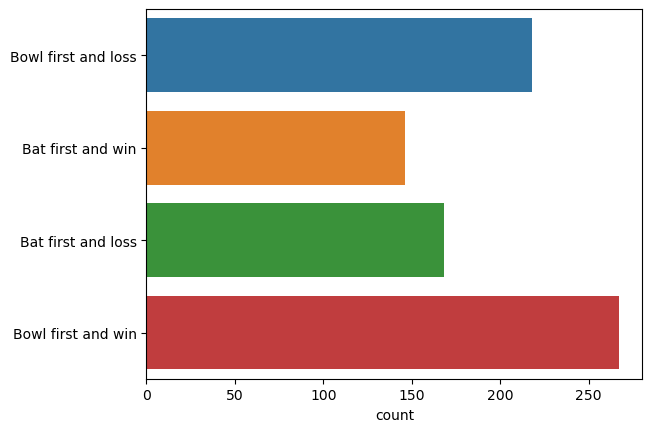

In [45]:
list_of_matchdecision_tossdecision = []
for index, row in df.iterrows():
    if row["toss_decision"] == "field" and row["result"] == "wickets":    # No of teams choose field and winning
        list_of_matchdecision_tossdecision.append("Bowl first and win")
    elif row["toss_decision"] == "field" and row["result"] == "runs":    # No of teams choose field and losing
        list_of_matchdecision_tossdecision.append("Bowl first and loss")
    elif row["toss_decision"] == "bat" and row["result"] == "runs":    # No of teams choose bat and winning
        list_of_matchdecision_tossdecision.append("Bat first and win")
    else:
        list_of_matchdecision_tossdecision.append("Bat first and loss") # No of teams choose bat and losing
        
sns.countplot(y=list_of_matchdecision_tossdecision)

We can conclude that team winning the toss and bowling first have won most number of matches.